# Experiment of Determining the Number of Hidden Layers #

## Motivation ##

https://www.heatonresearch.com/2017/06/01/hidden-layers.html

Rule-of-thumb methods:

- The number of hidden neurons should be between the size of the input layer and the size of the output layer.
- The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
- The number of hidden neurons should be less than twice the size of the input layer.

## Dataset ##

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('./data/hour_preprocessed.csv')

In [4]:
data.dtypes

temp                   float64
humidity               float64
windspeed              float64
hour                     int64
weekday                  int64
month                    int64
year                     int64
season_1               float64
season_2               float64
season_3               float64
season_4               float64
is_holiday_0           float64
is_holiday_1           float64
weather_condition_1    float64
weather_condition_2    float64
weather_condition_3    float64
weather_condition_4    float64
is_workingday_0        float64
is_workingday_1        float64
total_count              int64
dtype: object

In [5]:
data.head(n=10)

,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1,total_count
0,0.24,0.81,0.0000,0,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,16
1,0.22,0.80,0.0000,1,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,40
2,0.22,0.80,0.0000,2,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,32
3,0.24,0.75,0.0000,3,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,13
4,0.24,0.75,0.0000,4,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
5,0.24,0.75,0.0896,5,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
6,0.22,0.80,0.0000,6,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
7,0.20,0.86,0.0000,7,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3
8,0.24,0.75,0.0000,8,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8
9,0.32,0.76,0.0000,9,6,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,14


In [23]:
SIZE_INPUT = 19
SIZE_OUTPUT = 1

SIZE_RULE_2 = int(2/3 * (SIZE_INPUT + SIZE_OUTPUT))

MIN_SIZE = SIZE_OUTPUT + 1
MAX_SIZE = 2 * SIZE_INPUT

print('Hidden layer size were recommended being btw {} and {}'.format(MIN_SIZE, MAX_SIZE))

Hidden layer size were recommended being btw 2 and 38


## Split Train and Test data ##

In [7]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [8]:
X.shape

(17379, 19)

In [9]:
y.shape

(17379,)

In [10]:
from sklearn.model_selection import train_test_split

In [22]:
test_size=0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

## Build model ##

In [12]:
from utils.nn import create_mlp_nn
from sklearn import metrics

In [17]:
dnn = create_mlp_nn(hidden_layer_sizes=(160, 80, 40), verbose=False)
dnn.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(160, 80, 40), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=13, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [18]:
print("R-squared::{}".format(dnn.score(X_train, y_train)))
print("Pred R-squared::{}".format(dnn.score(X_test, y_test)))
print("MSE::{}".format(metrics.mean_squared_error(y_test, dnn.predict(X_test))))

R-squared::0.9106457314393288
Pred R-squared::0.9002130472935612
MSE::3336.8798909376187


## Test size of hidden layers ##

I use `predict-r2` and `MSE` as the evaluating measure.

### Experiment 1: 2 hidden layers, later one has 2/3 size of input + output ###

In [24]:
pred_history = []
for size1 in range(MIN_SIZE, MAX_SIZE + 1):
    # Use 2 layers
    hls = (size1, SIZE_RULE_2)
    
    dnn = create_mlp_nn(hidden_layer_sizes=hls, verbose=False)
    dnn.fit(X_train, y_train)
    
    r2 = dnn.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, dnn.predict(X_test))
    
    pred_history.append({'size': hls, 
                          'score': r2,
                          'mse': mse })
    
    print('Done {}/{}. Result: R2={}, MSE={}'.format(size1, MAX_SIZE, r2, mse))

Done 2/38. Result: R2=0.5901009090145379, MSE=13707.042823993768
Done 3/38. Result: R2=0.5912882249884386, MSE=13667.338927942812
Done 4/38. Result: R2=0.6808065542541837, MSE=10673.842236286422
Done 5/38. Result: R2=0.771016468959812, MSE=7657.218898464167
Done 6/38. Result: R2=0.6675587028726213, MSE=11116.85094307914
Done 7/38. Result: R2=0.8649887396751468, MSE=4514.782217606256
Done 8/38. Result: R2=0.7780391099175178, MSE=7422.381489790288
Done 9/38. Result: R2=0.7096397200185008, MSE=9709.659961735282
Done 10/38. Result: R2=0.6718424110075263, MSE=10973.603563072833
Done 11/38. Result: R2=0.6905200937472437, MSE=10349.02106753528
Done 12/38. Result: R2=0.7480536141777407, MSE=8425.097727134618
Done 13/38. Result: R2=0.6262425938966737, MSE=12498.46336308373
Done 14/38. Result: R2=0.595873176562977, MSE=13514.017954658766
Done 15/38. Result: R2=0.6401821230987452, MSE=12032.324920913134
Done 16/38. Result: R2=0.80805949646165, MSE=6418.498502482416
Done 17/38. Result: R2=0.684270

In [25]:
from matplotlib import pyplot as plt
import seaborn as sn

/Users/magicii/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [26]:
pred_history

[{'size': (2, 13), 'score': 0.5901009090145379, 'mse': 13707.042823993768},
 {'size': (3, 13), 'score': 0.5912882249884386, 'mse': 13667.338927942812},
 {'size': (4, 13), 'score': 0.6808065542541837, 'mse': 10673.842236286422},
 {'size': (5, 13), 'score': 0.771016468959812, 'mse': 7657.218898464167},
 {'size': (6, 13), 'score': 0.6675587028726213, 'mse': 11116.85094307914},
 {'size': (7, 13), 'score': 0.8649887396751468, 'mse': 4514.782217606256},
 {'size': (8, 13), 'score': 0.7780391099175178, 'mse': 7422.381489790288},
 {'size': (9, 13), 'score': 0.7096397200185008, 'mse': 9709.659961735282},
 {'size': (10, 13), 'score': 0.6718424110075263, 'mse': 10973.603563072833},
 {'size': (11, 13), 'score': 0.6905200937472437, 'mse': 10349.02106753528},
 {'size': (12, 13), 'score': 0.7480536141777407, 'mse': 8425.097727134618},
 {'size': (13, 13), 'score': 0.6262425938966737, 'mse': 12498.46336308373},
 {'size': (14, 13), 'score': 0.595873176562977, 'mse': 13514.017954658766},
 {'size': (15, 13

In [27]:
hist_df = pd.DataFrame(data={'x': [ins['size'][0] for ins in pred_history],
                             'r2': [ins['score'] for ins in pred_history],
                             'mse': [ins['mse'] for ins in pred_history]})

/Users/magicii/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'r2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


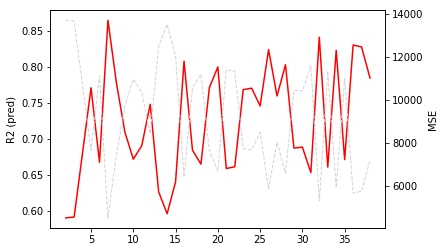

In [40]:
ax1 = plt.subplot()
ax1.plot('x', 'r2', data=hist_df, color='red', label='R2 (pred)')
ax1.set_ylabel('R2 (pred)')

ax2 = ax1.twinx()
ax2.plot('x', 'mse', data=hist_df, color='lightgray', linestyle='dashed', linewidth=1, label='MSE')
ax2.set_ylabel('MSE')

plt.show()

### Experiment 2: 2 hidden layers, prior one has 2/3 size of input + output ###

In [ ]:
pred_history_2 = []
for size2 in range(MIN_SIZE, MAX_SIZE + 1):
    # Use 2 layers
    hls = (SIZE_RULE_2, size2)
    
    dnn = create_mlp_nn(hidden_layer_sizes=hls, verbose=False)
    dnn.fit(X_train, y_train)
    
    r2 = dnn.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, dnn.predict(X_test))
    
    pred_history_2.append({'size': hls, 
                           'score': r2,
                           'mse': mse })
    
    print('Done {}/{}. Result: R2={}, MSE={}'.format(size2, MAX_SIZE, r2, mse))

Done 2/38. Result: R2=0.597726767099166, MSE=13452.03380925213


/Users/magicii/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Done 3/38. Result: R2=-0.5545705833092343, MSE=51984.90561935985
Done 4/38. Result: R2=0.6757013826319742, MSE=10844.559389821032
Done 5/38. Result: R2=0.6589927330252379, MSE=11403.29733466503
Done 6/38. Result: R2=0.5370971660120396, MSE=15479.490216888744


In [ ]:
hist_df = pd.DataFrame(data={'x': [ins['size'][1] for ins in pred_history],
                             'r2': [ins['score'] for ins in pred_history],
                             'mse': [ins['mse'] for ins in pred_history]})

In [ ]:
ax1 = plt.subplot()
ax1.plot('x', 'r2', data=hist_df, color='red', label='R2 (pred)')
ax1.set_ylabel('R2 (pred)')

ax2 = ax1.twinx()
ax2.plot('x', 'mse', data=hist_df, color='lightgray', linestyle='dashed', linewidth=1, label='MSE')
ax2.set_ylabel('MSE')

plt.show()